In [93]:
import numpy as np
from skimage import feature, color, img_as_float
import matplotlib.pyplot as plt
from skimage.feature import blob_dog

def extract_features(image):
    # Check if the image has the shape (2, height, width)
    if image.ndim == 3 and image.shape[0] == 2:
        # Average the two channels to create a single channel representation
        gray_image = np.mean(image, axis=0)
    else:
        raise ValueError("Input image must have shape (2, height, width)")

    # Extract HOG features
    hog_features, hog_image = feature.hog(gray_image, 
                                           orientations=9, 
                                           pixels_per_cell=(8, 8),
                                           cells_per_block=(16, 16), 
                                           visualize=True)

    # Extract LBP features
    lbp = feature.local_binary_pattern(gray_image, P=8, R=2, method='uniform')
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 5), range=(0, 4))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= lbp_hist.sum()  # Normalize the histogram

    # Combine HOG and LBP features into a single feature vector
    features = np.hstack((hog_features, lbp_hist))

    return features, gray_image, hog_image, lbp

def detect_blobs(gray_image):
    # Detect blobs using the Difference of Gaussians method
    blobs = blob_dog(gray_image, max_sigma=30, threshold=0.1)

    return blobs

def visualize_features(gray_image, hog_image, lbp, blobs):
    plt.figure(figsize=(12, 8))

    # Original Grayscale Image
    plt.subplot(1, 4, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # HOG Features
    plt.subplot(1, 4, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    # LBP Features
    plt.subplot(1, 4, 3)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Features')
    plt.axis('off')

    # Blobs on Original Image
    plt.subplot(1, 4, 4)
    plt.imshow(gray_image, cmap='gray')
    plt.scatter(blobs[:, 1], blobs[:, 0], s=blobs[:, 2] * 20, edgecolor='red', facecolor='none')
    plt.title('Detected Blobs')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [94]:
import glob
images = glob.glob('dataset/1/EPSILON/*.npy')

Extracted Features Shape: (2308,)


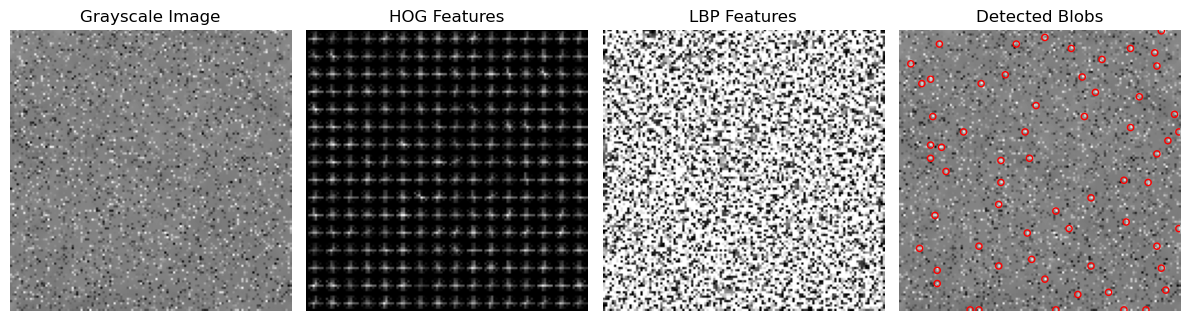

Extracted Features Shape: (2308,)


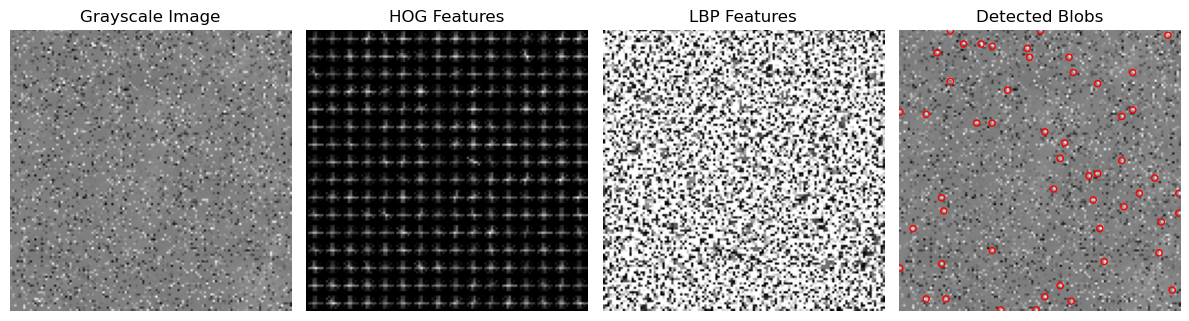

Extracted Features Shape: (2308,)


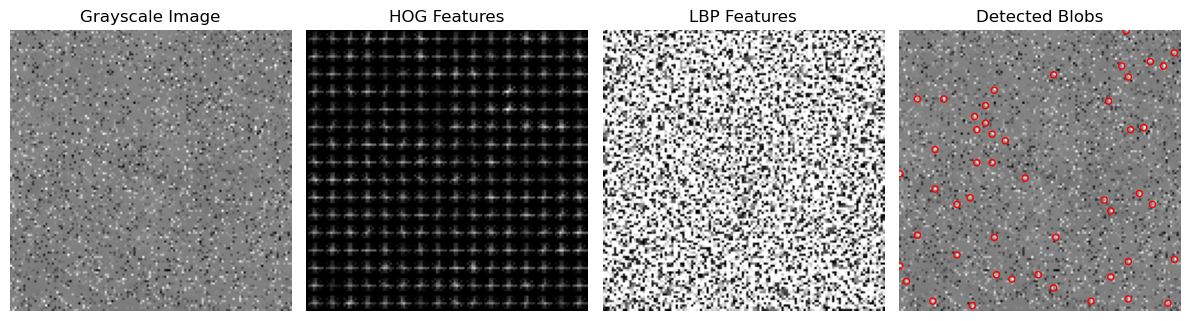

Extracted Features Shape: (2308,)


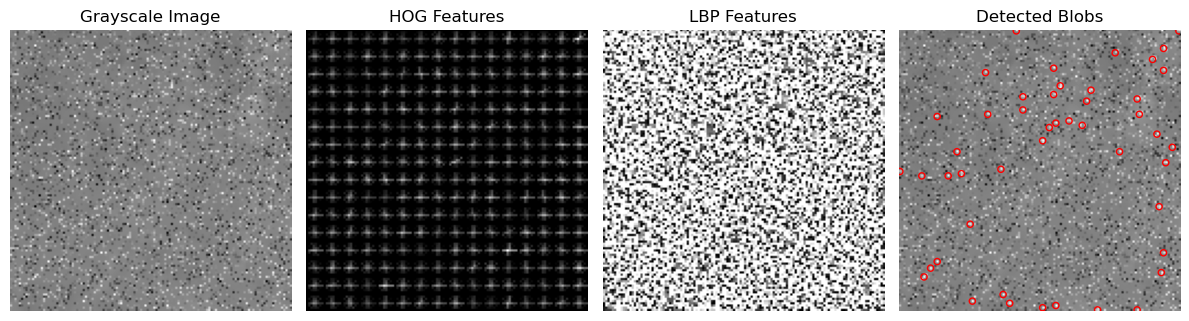

Extracted Features Shape: (2308,)


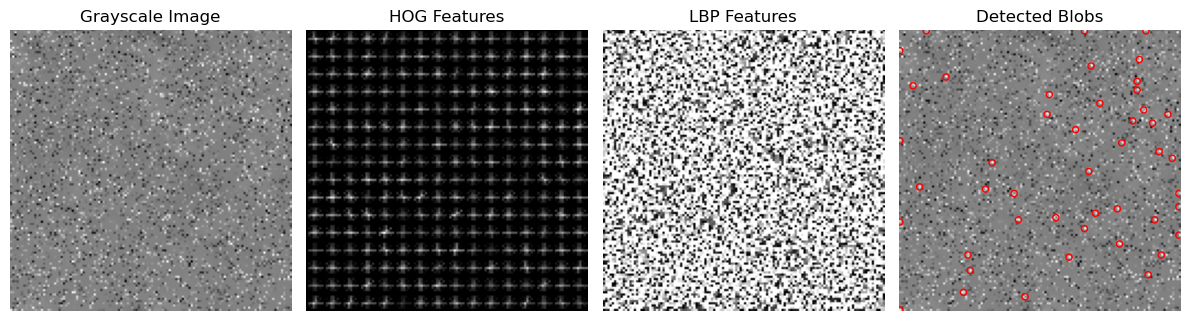

Extracted Features Shape: (2308,)


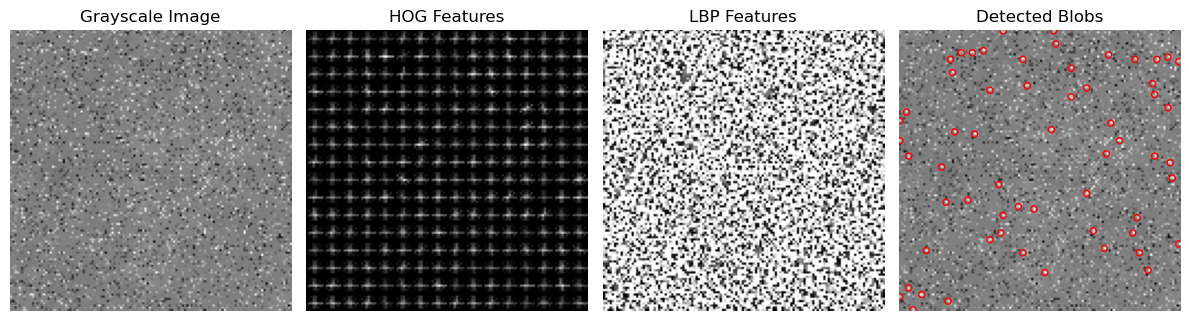

Extracted Features Shape: (2308,)


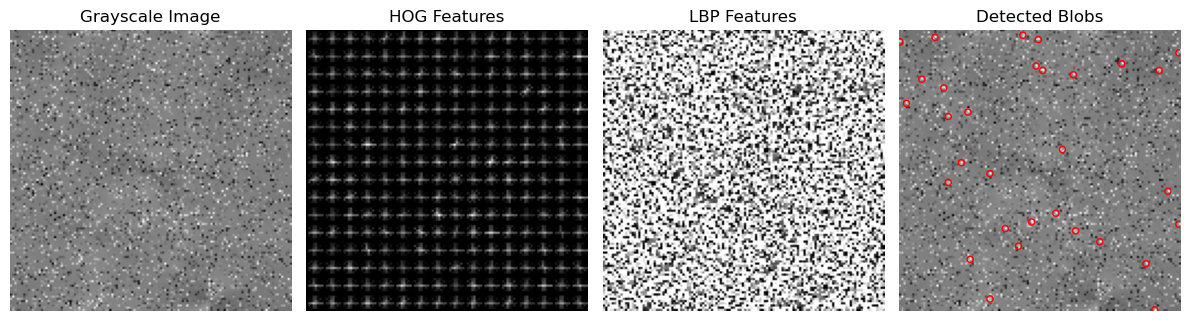

Extracted Features Shape: (2308,)


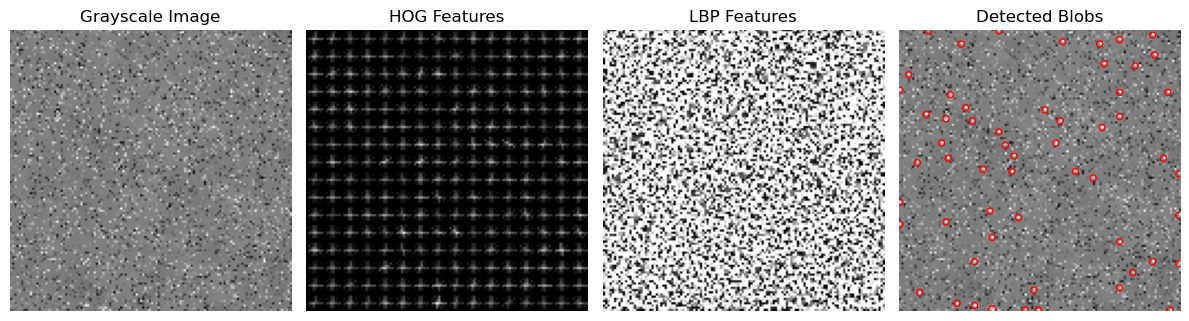

Extracted Features Shape: (2308,)


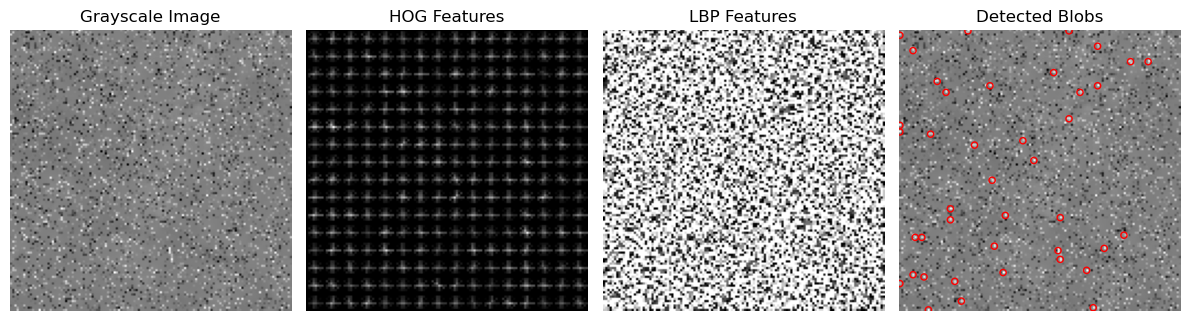

Extracted Features Shape: (2308,)


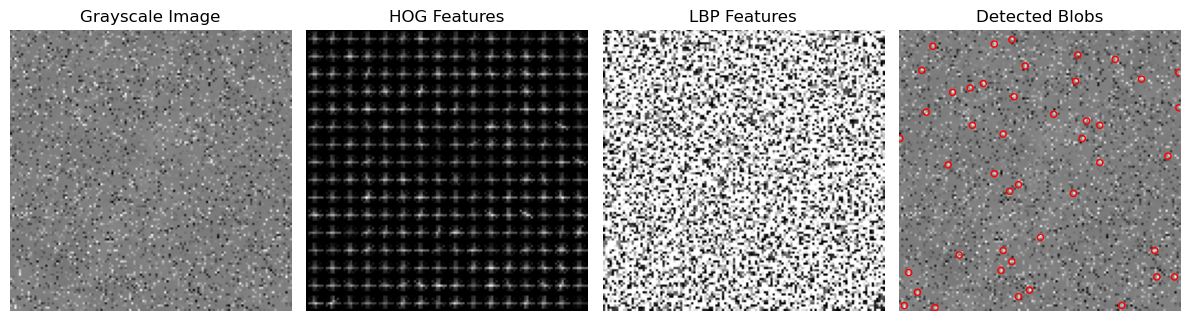

Extracted Features Shape: (2308,)


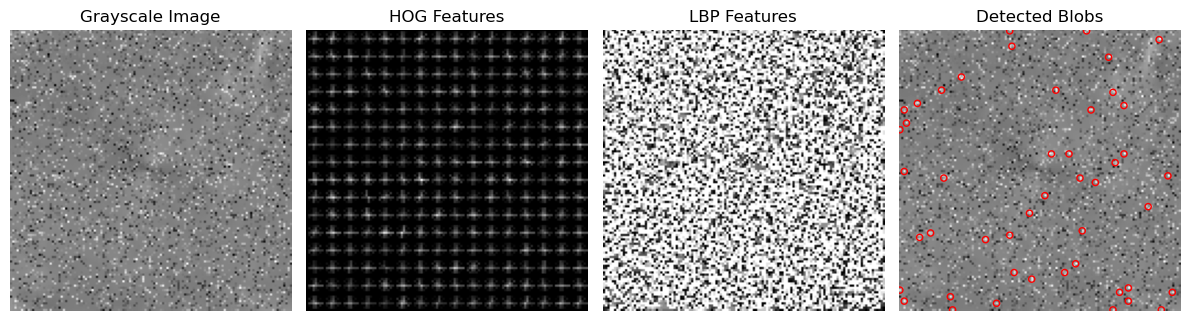

In [95]:
# Load your image (replace 'your_image.png' with your image path)


for i in range(11):
    image = np.load(images[i])[:2,:,:]
    # Extract features
    features, gray_image, hog_image, lbp = extract_features(image)
    #print(lbp)
    #break
    print("Extracted Features Shape:", features.shape)

    # Detect blobs
    blobs = detect_blobs(gray_image)

    # Visualize the features and blobs
    visualize_features(gray_image, hog_image, lbp, blobs)

In [48]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_tensor(tensor, cmap='viridis', title='2D Tensor Heatmap'):
    """
    Plots a 2D tensor as a heatmap.

    Parameters:
    - tensor: 2D PyTorch tensor
    - cmap: Colormap for the heatmap (default is 'viridis')
    - title: Title for the plot (default is '2D Tensor Heatmap')
    """
    tensor = tensor[0,0,:,:]
    
    # Convert the tensor to a NumPy array
    tensor_np = tensor.detach().cpu().numpy()
    
    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(tensor_np, cmap=cmap)
    plt.colorbar()  # Add color bar to show the scale
    plt.title(title)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()


In [49]:
import numpy as np
npy = np.load("dataset/1/KAPPA/00001_00001.npy")

In [50]:
# set x to a random tensor of shape 1,1,128,128 with random clusteres formed by gaussian noise
x = torch.from_numpy(npy).float().reshape(1,1,128,128)


In [52]:
from torch.functional import F
def soft_max(t):
    B,C,H,W = t.shape
    return F.softmax(t.view(B, C, -1), dim=-1).view(B, C, H, W)

In [68]:
def soft_binary_mask(t):
    return (t - t.mean(dim=(-1,-2),keepdim=True)).sigmoid()

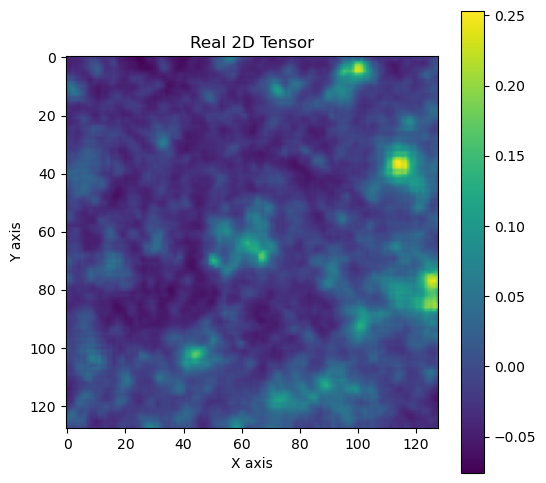

In [66]:
plot_2d_tensor(x, title='Real 2D Tensor')

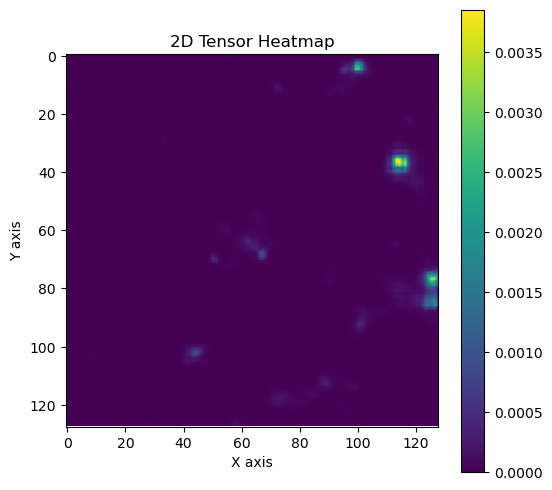

In [75]:
plot_2d_tensor((x-x.min())**5)

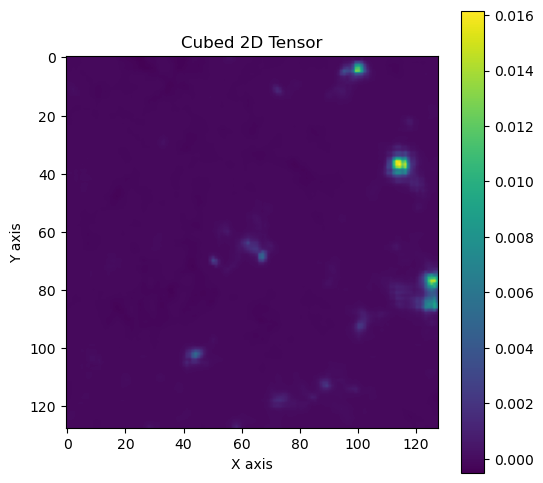

In [47]:
plot_2d_tensor((x**3 - (x**3).mean(dim=(-1,-2),keepdim=True)), title='Cubed 2D Tensor')

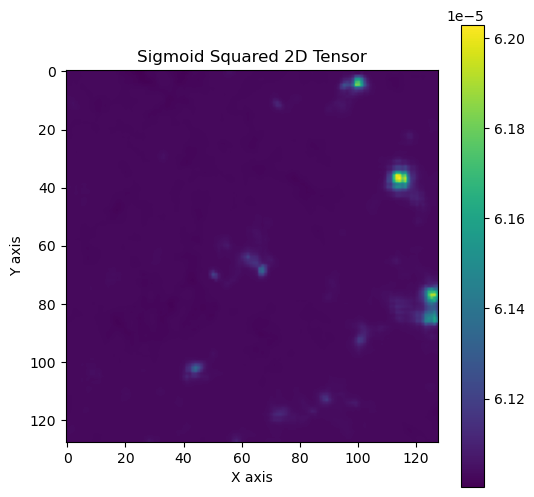

In [44]:
plot_2d_tensor(soft_max((x**3))[0,0,:,:], title='Sigmoid Squared 2D Tensor')

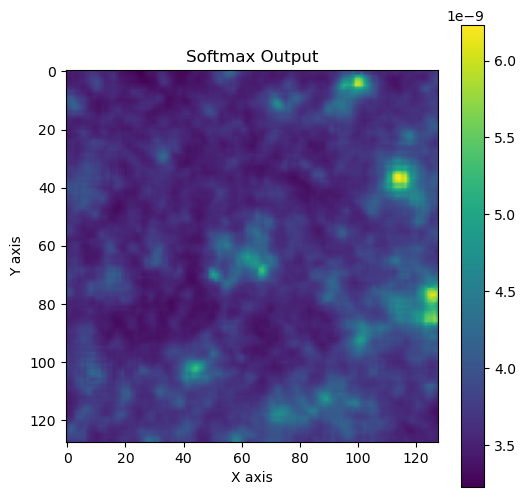

In [41]:
plot_2d_tensor((soft_max(x)**2)[0,0,:,:], title='Softmax Output')

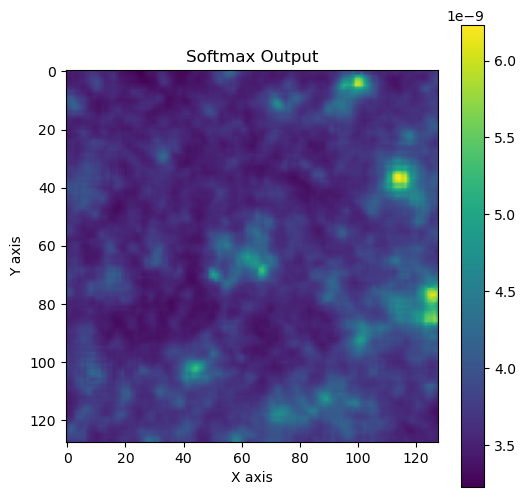

In [30]:
plot_2d_tensor(soft_max(x)[0,0,:,:], title='Softmax Output')